In [28]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import string
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
import nltk

In [29]:
# Download tokenizer data
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [30]:
# Initialize the variables and lists
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 37
page_size = 100
reviews = []

# Loop through each page to scrape the reviews
for i in range(1, pages + 1):
    print(f"Scraping page {i}")

    # Create the URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    
    # Find all the review paragraphs and add to the reviews list
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"  ---> {len(reviews)} total reviews")


Scraping page 1
  ---> 100 total reviews
Scraping page 2
  ---> 200 total reviews
Scraping page 3
  ---> 300 total reviews
Scraping page 4
  ---> 400 total reviews
Scraping page 5
  ---> 500 total reviews
Scraping page 6
  ---> 600 total reviews
Scraping page 7
  ---> 700 total reviews
Scraping page 8
  ---> 800 total reviews
Scraping page 9
  ---> 900 total reviews
Scraping page 10
  ---> 1000 total reviews
Scraping page 11
  ---> 1100 total reviews
Scraping page 12
  ---> 1200 total reviews
Scraping page 13
  ---> 1300 total reviews
Scraping page 14
  ---> 1400 total reviews
Scraping page 15
  ---> 1500 total reviews
Scraping page 16
  ---> 1600 total reviews
Scraping page 17
  ---> 1700 total reviews
Scraping page 18
  ---> 1800 total reviews
Scraping page 19
  ---> 1900 total reviews
Scraping page 20
  ---> 2000 total reviews
Scraping page 21
  ---> 2100 total reviews
Scraping page 22
  ---> 2200 total reviews
Scraping page 23
  ---> 2300 total reviews
Scraping page 24
  ---> 2400 

In [31]:
# Create a DataFrame with the scraped reviews
df = pd.DataFrame()
df["reviews"] = reviews

In [32]:
df.to_csv("BA_reviews.csv")


In [33]:
reviews = pd.read_csv("BA_reviews.csv")
reviews = reviews.pop('reviews')
reviews

0       Not Verified |  I flew internationally for the...
1       ✅ Trip Verified | BA, after subsequent delays ...
2       Not Verified |   It is embarrassing to have th...
3       ✅ Trip Verified | Flight cancelled due to bad ...
4       ✅ Trip Verified |  British Airways oversold my...
                              ...                        
3695    Flew LHR to Larnaca and return 22nd April and ...
3696    LHR-SEA in "first" class. The experience was r...
3697    I had flight from Vancouver to London and back...
3698    London Gatwick to Bridgetown on Avios companio...
3699    LHR-PEK-LHR. We travel BA club world often and...
Name: reviews, Length: 3700, dtype: object

In [34]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation,'')
    return text

In [35]:
reviews = reviews.str.replace('Trip Verified |','')
reviews = reviews.str.replace('✅','')
reviews = reviews.str.replace('|','')
reviews = reviews.str.replace(r'\b(\w{1,3})\b','')
reviews = reviews.apply(remove_punctuations)
reviews 

0       Not Verified   I flew internationally for the ...
1         BA after subsequent delays and postponed dep...
2       Not Verified    It is embarrassing to have the...
3         Flight cancelled due to bad weather BA conta...
4          British Airways oversold my LHR to LAX flig...
                              ...                        
3695    Flew LHR to Larnaca and return 22nd April and ...
3696    LHRSEA in first class The experience was reall...
3697    I had flight from Vancouver to London and back...
3698    London Gatwick to Bridgetown on Avios companio...
3699    LHRPEKLHR We travel BA club world often and my...
Name: reviews, Length: 3700, dtype: object

In [36]:
reviews.shape

(3700,)

In [37]:
freq_words = pd.Series(''.join(reviews).lower().split()).value_counts()[:50]
freq_words

the        30088
to         20111
and        18504
a          13659
was        13092
i          10948
of          8644
in          8487
on          7972
flight      6614
for         6415
with        5974
is          4773
not         4623
ba          4534
were        4504
it          4409
that        4397
we          4341
my          4262
but         3957
at          3931
they        3651
this        3619
had         3590
as          3497
have        3382
from        3122
no          3022
service     2827
very        2795
be          2398
seat        2371
food        2302
so          2227
you         2170
airways     2163
british     2155
are         2126
crew        2123
london      2108
seats       2091
an          2084
good        2049
time        2043
me          2029
cabin       1960
class       1921
which       1917
there       1766
Name: count, dtype: int64

C:\Users\HP\AppData\Local\Temp\ipykernel_11104\4235992646.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  freq_words.plot.barh(x=freq_words[0], y=freq_words[1])


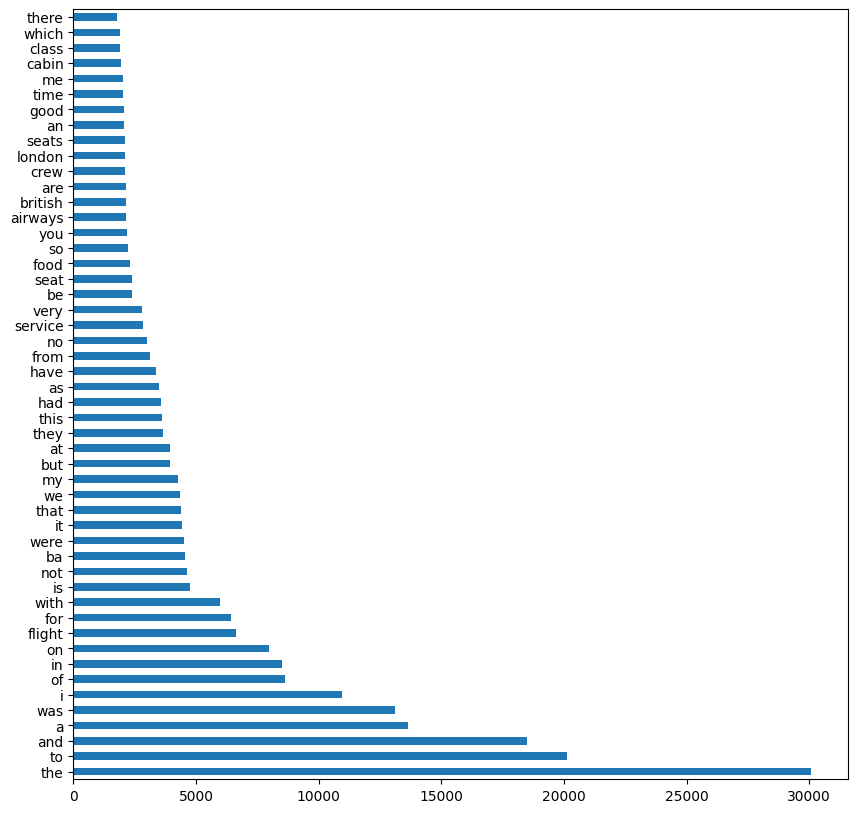

In [38]:
plt.figure(figsize=(10,10))
freq_words.plot.barh(x=freq_words[0], y=freq_words[1])
plt.show()

## text clustering

In [39]:
categories = ['negative','positive']
num_cat = len(categories)
num_cat

2

In [40]:
# Initialize regex tokenizer
tokenizer = RegexpTokenizer(r'\w+')


In [41]:
# Define a custom tokenizer function for TfidfVectorizer
def custom_tokenizer(text):
    return tokenizer.tokenize(text)

In [42]:
# Vectorize documents using TF-IDF
tf_idf_vect = TfidfVectorizer(lowercase=True, stop_words='english', ngram_range=(1, 1), tokenizer=custom_tokenizer)


In [43]:
# Fit and Transform Text Data
reviews_counts = tf_idf_vect.fit_transform(df['reviews'])

C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [44]:
# Check the shape of the count vector
print(reviews_counts.shape)

(3700, 13881)


In [45]:
# To see the top 50 words
freq_words = pd.Series(np.array(tf_idf_vect.get_feature_names_out())[reviews_counts.sum(axis=0).A1.argsort()[-50:][::-1]])
print(freq_words)

0          flight
1              ba
2         service
3            seat
4            good
5               t
6            food
7         british
8         airways
9            crew
10          seats
11          class
12         london
13           time
14          cabin
15       verified
16           trip
17       business
18          staff
19       heathrow
20        economy
21              s
22          check
23        flights
24         return
25           club
26            lhr
27          plane
28        airline
29          hours
30         lounge
31           just
32       boarding
33       aircraft
34     experience
35     passengers
36            new
37            fly
38            did
39           meal
40         review
41          great
42              2
43           hour
44    comfortable
45         really
46       airlines
47         drinks
48       customer
49        premium
dtype: object


In [46]:
# import KMeans Model
from sklearn.cluster import KMeans

# Create Kmeans object and fit it to the training data
kmeans = KMeans(n_clusters=num_cat).fit(reviews_counts)

# Get the labels using KMeans
pred_labels = kmeans.labels_
pred_labels

array([1, 1, 1, ..., 0, 0, 0])

In [48]:
cluster_centres = kmeans.cluster_centers_
cluster_centres

array([[3.27296869e-04, 8.02978041e-04, 7.77889130e-04, ...,
        6.30636379e-05, 9.20507079e-05, 0.00000000e+00],
       [7.54476849e-04, 4.29911848e-03, 1.17877052e-03, ...,
        0.00000000e+00, 0.00000000e+00, 4.36439835e-05]])

In [50]:
unique , counts = np.unique(pred_labels, return_counts=True)
dict(zip(unique, counts))

{0: 2177, 1: 1523}

In [53]:
from sklearn import metrics

# Convert sparse matrix to dense array
reviews_counts_array = reviews_counts.toarray()

# Compute DBI (Davies-Bouldin Index) score
dbi = metrics.davies_bouldin_score(reviews_counts_array, pred_labels)

# Compute Silhouette Score
ss = metrics.silhouette_score(reviews_counts_array, pred_labels, metric='euclidean')

# Print the DBI and Silhouette Scores
print("DBI Score:", dbi)
print("Silhouette Score:", ss)


DBI Score: 12.578863511039819
Silhouette Score: 0.006404739866184422


In [57]:
# Create a DataFrame with the reviews and predicted labels
df_reviews = pd.DataFrame({'review': reviews, 'labels': pred_labels})

# Display the DataFrame
print(df_reviews)


                                                 review  labels
0     Not Verified   I flew internationally for the ...       1
1       BA after subsequent delays and postponed dep...       1
2     Not Verified    It is embarrassing to have the...       1
3       Flight cancelled due to bad weather BA conta...       1
4        British Airways oversold my LHR to LAX flig...       1
...                                                 ...     ...
3695  Flew LHR to Larnaca and return 22nd April and ...       0
3696  LHRSEA in first class The experience was reall...       0
3697  I had flight from Vancouver to London and back...       0
3698  London Gatwick to Bridgetown on Avios companio...       0
3699  LHRPEKLHR We travel BA club world often and my...       0

[3700 rows x 2 columns]


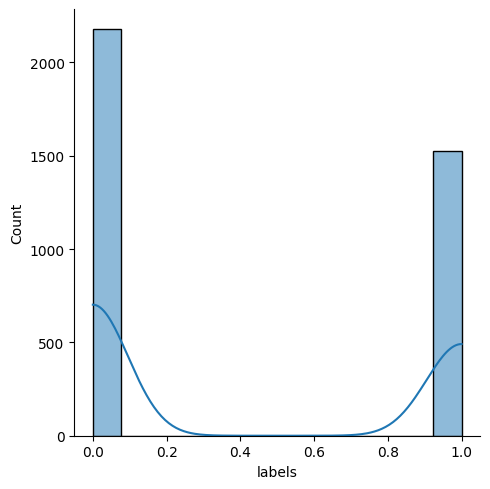

In [58]:
sns.displot(df_reviews['labels'], kde = True)

In [63]:
negative_review = df_reviews[df_reviews['labels']==1]
negative_review

,review,labels
0,Not Verified I flew internationally for the ...,1
1,BA after subsequent delays and postponed dep...,1
2,Not Verified It is embarrassing to have the...,1
3,Flight cancelled due to bad weather BA conta...,1
4,British Airways oversold my LHR to LAX flig...,1
...,...,...
3672,Very disappointed with my flight back from Mun...,1
3673,I flew with British Airways with my mother fro...,1
3679,I flew GlasgowGatwickVegasGatwickGlasgow I hav...,1
3687,LGWJER return Out on B737 back on A319 both fl...,1


In [64]:
positive_review = df_reviews[df_reviews['labels']==0]
positive_review

,review,labels
8,Not Verified Singapore to Heathrow Business...,0
14,This is a route I fly regularly Used first c...,0
15,While BA may have made some positive improv...,0
16,British Airways new Club Suite is a marked i...,0
17,Four very pleasant on time flights with fri...,0
...,...,...
3695,Flew LHR to Larnaca and return 22nd April and ...,0
3696,LHRSEA in first class The experience was reall...,0
3697,I had flight from Vancouver to London and back...,0
3698,London Gatwick to Bridgetown on Avios companio...,0
